In [ ]:
#pip install --upgrade numpy

### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

### FaceDetector class

In [2]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

### Read Modi Image and Display

(-0.5, 899.5, 899.5, -0.5)

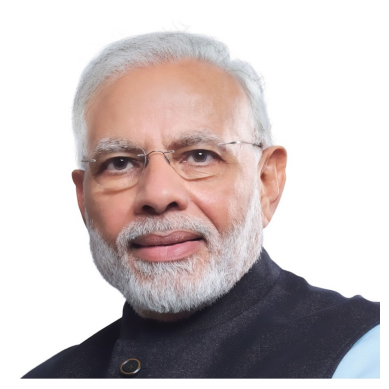

In [3]:
img = cv2.imread('modi.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

### Convert RGB To Gray Scale

(-0.5, 899.5, 899.5, -0.5)

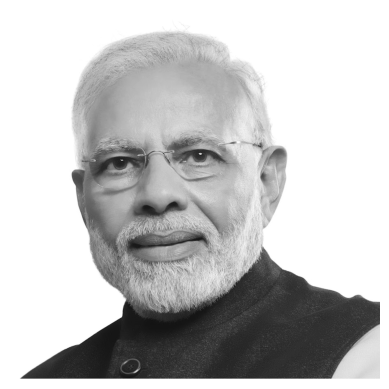

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, 'gray')
plt.axis('off')

In [5]:
img_gray.shape

(900, 900)

In [6]:
# Detects the face and gives the coordinates of box where the face is present
face = faceCascade.detectMultiScale(img_gray, 1.2, 4)

In [7]:
print(type(face))
print(face.shape)
print(face)

<class 'numpy.ndarray'>
(1, 4)
[[137 182 472 472]]


(-0.5, 899.5, 899.5, -0.5)

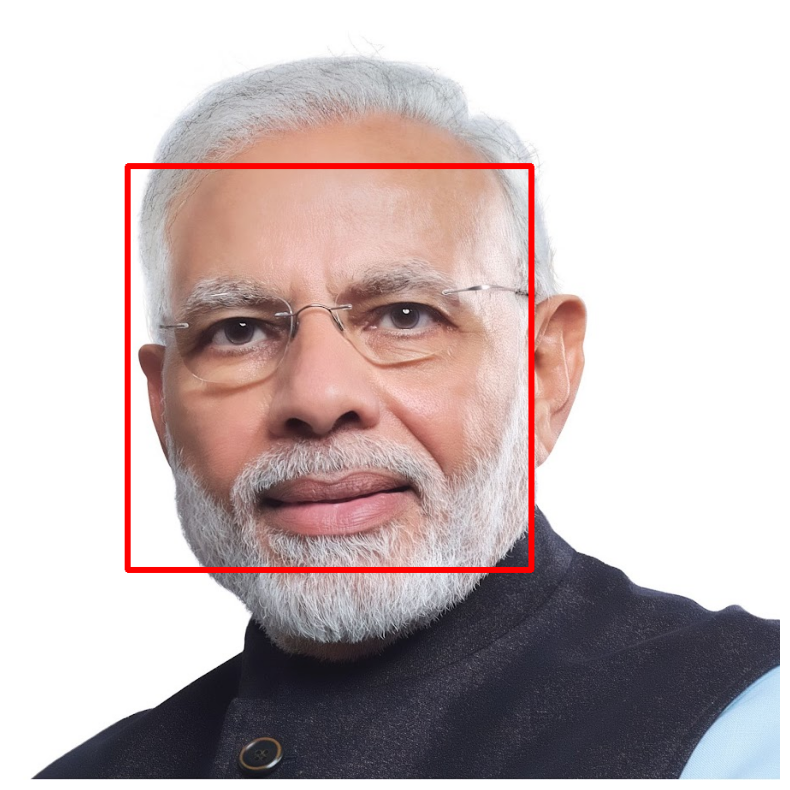

In [8]:
# Drawing a bounding box
cv2.rectangle(img, (137,182), (137+472, 182+472), (255,0,0), 6)

plt.figure(figsize = (10,10))
plt.imshow(img)
plt.axis('off')

In [ ]:
# Example 2
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('yogi.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

faces = faceCascade.detectMultiScale(img_gray, 1.2, 4)
(x,y,w,h) = faces[0]

cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 6)
plt.imshow(img)
plt.axis('off')

### Detecting Multiple Faces

In [9]:
# Example 3 (Multiple faces)
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('team.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

faces = faceCascade.detectMultiScale(img_gray, 1.2, 4)
faces

array([[2027,  507,  214,  214],
       [2928,  596,  193,  193],
       [ 514,  615,  183,  183],
       [1574,  462,  235,  235],
       [ 841,  557,  211,  211],
       [1169,  553,  209,  209],
       [ 171,  651,  192,  192],
       [2646,  573,  191,  191],
       [2368,  571,  209,  209]])

(-0.5, 3354.5, 1886.5, -0.5)

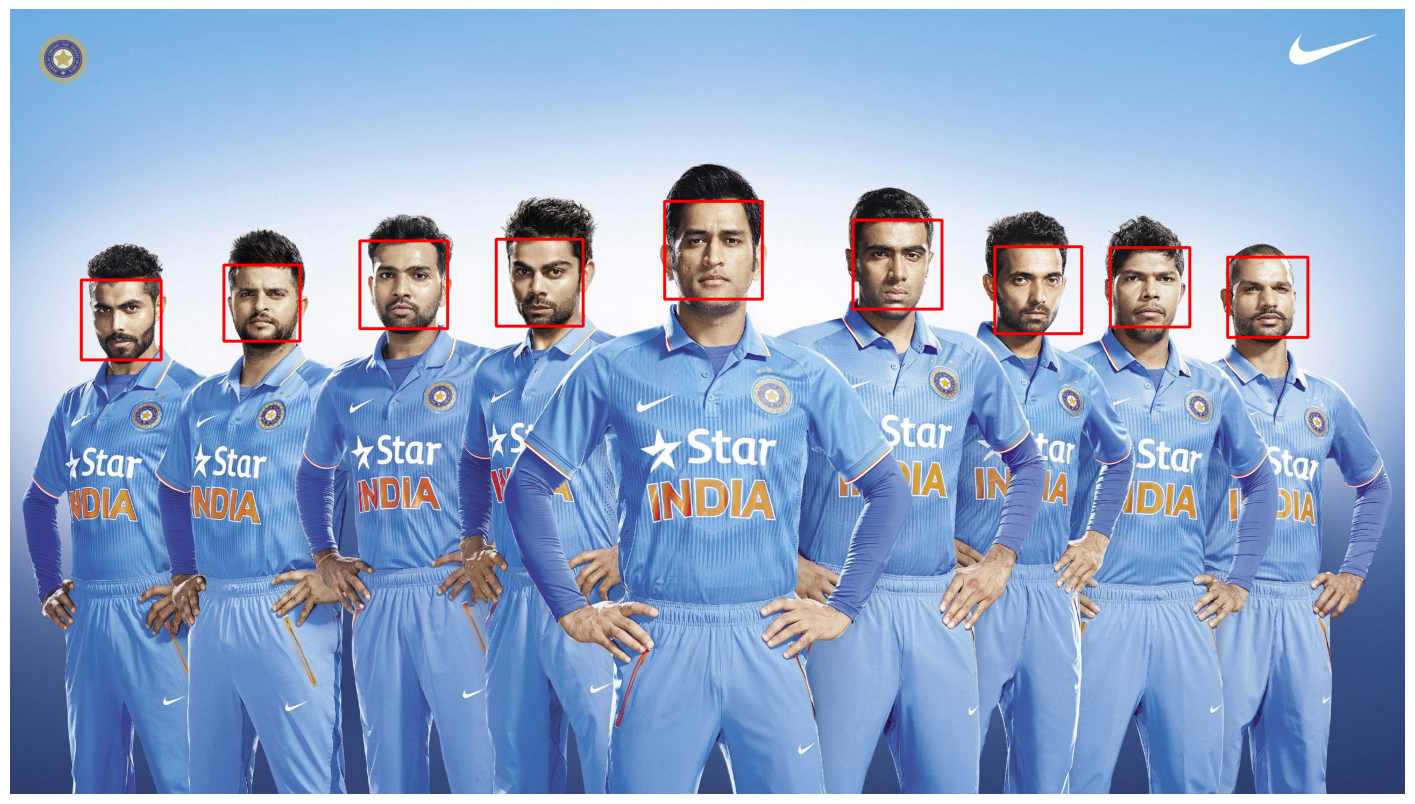

In [10]:
for x,y,w,h in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 6)
    
plt.figure(figsize = (18,14))
plt.imshow(img)
plt.axis('off')

In [12]:
# Function to detect face
def detect_face(image_path):
    '''
    Input   : Path to an image
    Return  : Image with bounding boxes around faces
    '''
    img = cv2.imread(image_path)                                # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                  # Convert to rgb
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)            # Create a grayscale version of image
    
    # Create a cascade classifier and use detect multiscale function
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = faceCascade.detectMultiScale(img_gray, 1.2, 4)
    
    # Draw the bounding boxes
    for x,y,w,h in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 6)
        
    return img

(-0.5, 899.5, 899.5, -0.5)

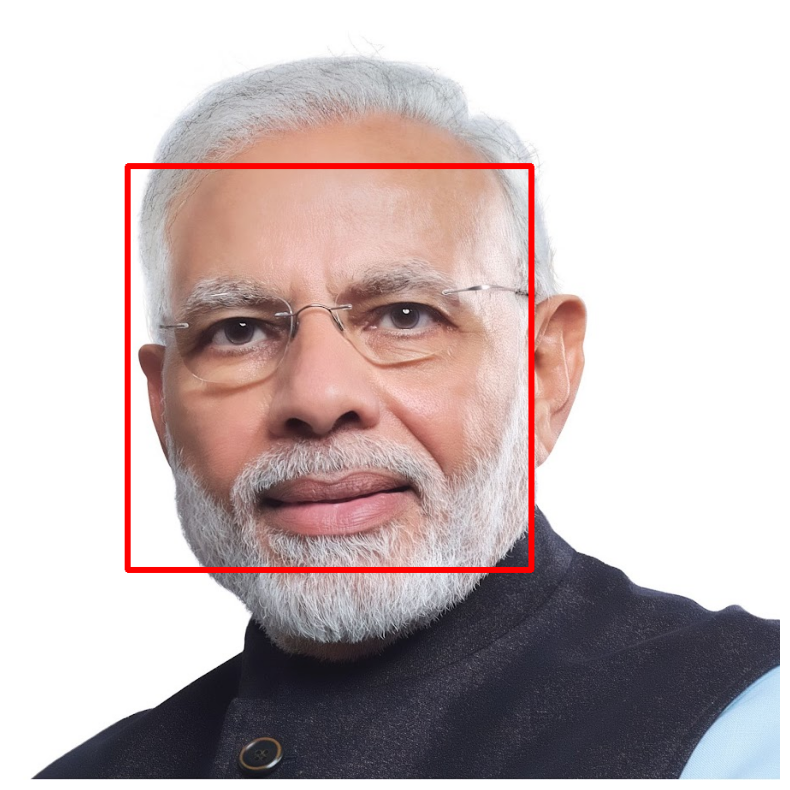

In [14]:
image = detect_face('modi.jpg')

plt.figure(figsize = (10,10))
plt.imshow(image)
plt.axis('off')

(-0.5, 1077.5, 1279.5, -0.5)

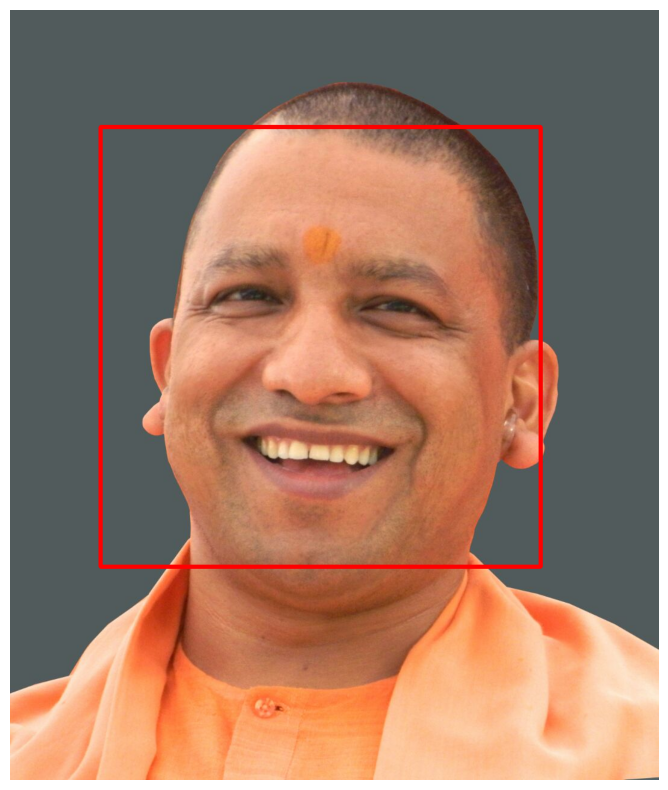

In [15]:
image = detect_face('yogi.jpg')

plt.figure(figsize = (10,10))
plt.imshow(image)
plt.axis('off')

(-0.5, 3354.5, 1886.5, -0.5)

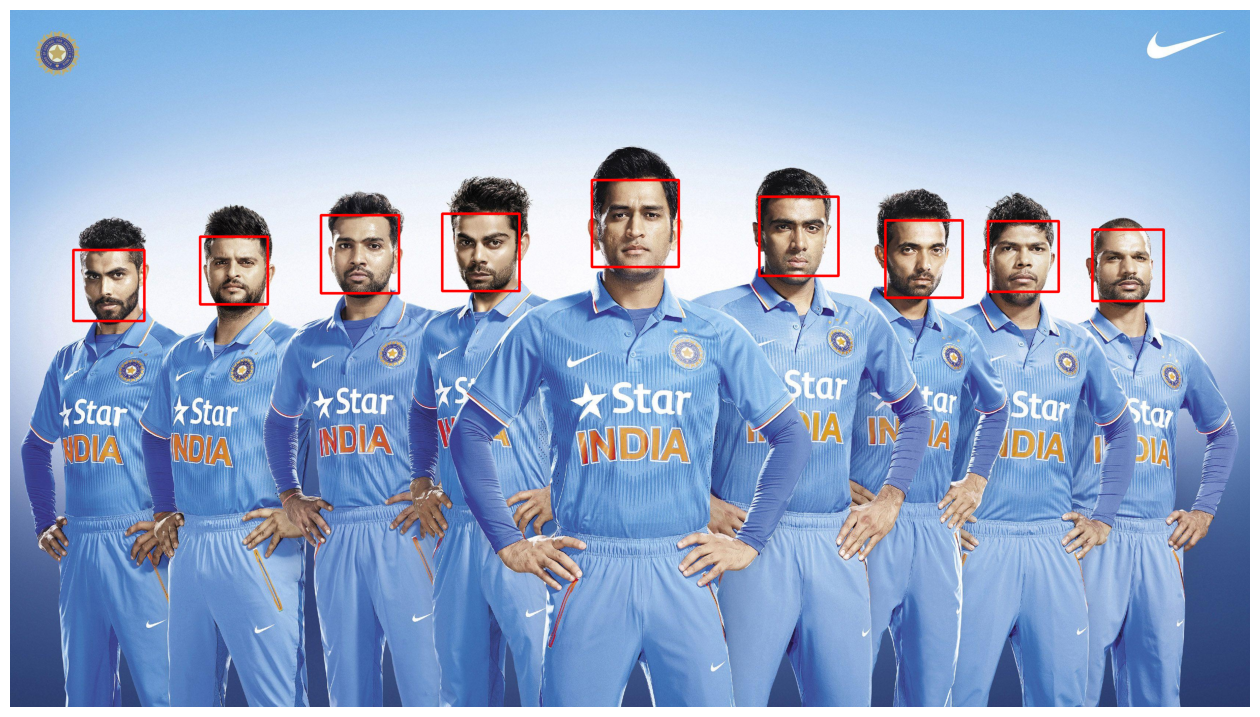

In [16]:
image = detect_face('team.jpg')

plt.figure(figsize = (16,10))
plt.imshow(image)
plt.axis('off')

### Face Detection Using Webcam

(-0.5, 639.5, 479.5, -0.5)

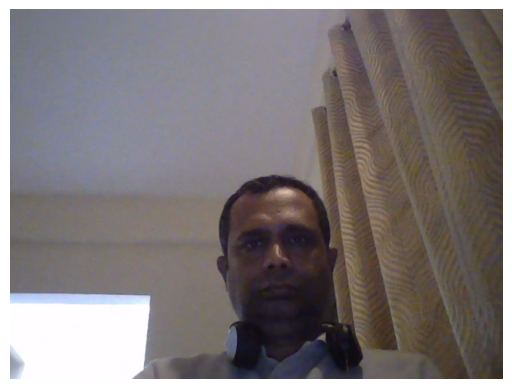

In [18]:
webcam = cv2.VideoCapture(0)
(_, img) = webcam.read()

webcam.release()
cv2.destroyAllWindows()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

In [20]:
# Function to detect face
def detect_face(img):
    '''
    Input   : An image
    Return  : Image with bounding boxes around faces
    '''
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                  # Convert to rgb
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)            # Create a grayscale version of image
    
    # Create a cascade classifier and use detect multiscale function
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = faceCascade.detectMultiScale(img_gray, 1.2, 4)
    
    # Draw the bounding boxes
    for x,y,w,h in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 6)
        
    return img

(-0.5, 639.5, 479.5, -0.5)

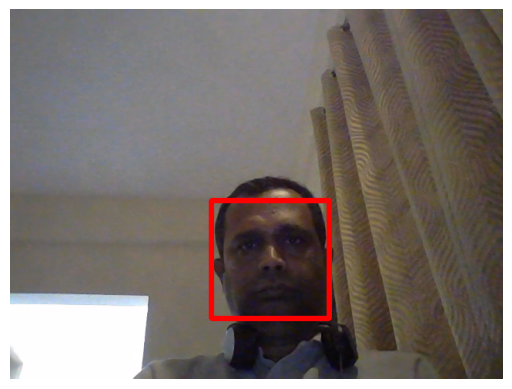

In [21]:
# Capturing and detecting image
webcam = cv2.VideoCapture(0)
(_, img) = webcam.read()

webcam.release()
cv2.destroyAllWindows()

image = detect_face(img)

plt.imshow(image)
plt.axis('off')